In [1]:
from numpy import *
import matplotlib.pyplot as plt
import sklearn as sk
import random as rnd

## Exercise 1.1

### Testing of the random data distribution 

In [2]:
N = []
for i in range(10000):
    N.append(0.1*rnd.randrange(0,10))

(array([ 981., 1026., 1005., 1028.,  984., 1000.,  989., 1011.,  957.,
        1019.]),
 array([0.  , 0.09, 0.18, 0.27, 0.36, 0.45, 0.54, 0.63, 0.72, 0.81, 0.9 ]),
 <a list of 10 Patch objects>)

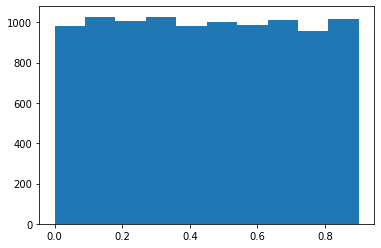

In [3]:
plt.hist(N)

We see the random data created by the randrange function is more or less a constant distribution. 

### Sampling the wanted data

First we take a look at the cummulative probabilities resulting from the given likelihoods p(X|Y=0) = 2x-2 and p(X|Y=1) = 2x:

We get:

$P(X \geq x|Y=0) = \int_0^x dx \;(2x-2) = x^2-2x\\
and \\
P(X \geq x|Y=1) = \int_0^x dx \;2x = x^2$

Using the random generated numbers p $\in [0,1]$ as cummulative Probabilities we can calculate the Features $X_0$ given Y=0 and $X_1$ given Y=1:

$X_0 = \frac{2\pm \sqrt{4-4*p}}{2} = 1 \pm \sqrt{1-p} = 1 - \sqrt{1-p}$

The other sulution with + doesn't make sence sice we want $X \in [0,1]$

and

$X_1 = \sqrt{p}$

In [4]:
def create_data(N):
    X = []
    Y = []
    for i in range(N):
        p = 0.1*rnd.randrange(0,10)     #generating random number between 0 and 1
        y = rnd.choice([0,1])   #choosing randomly between y=0 and y=1
        Y.append(y)     #appending to Y-list
        if y == 0:   # case 1: y = 0
            x = 1-sqrt(1-p)     #calculating the corresponding feature x
            X.append(x)         #appending to X-list
        elif y == 1:     #case 2: y = 1
            x = sqrt(p)     #calculating the corresponding feature x
            X.append(x)     #appending to X-list
        else:
            print("Something went wrong!")
    return X,Y

<span style ="color:green;font-weight:bold ">Changes that should be made:  
    - create data code is correct  
    - missing: you still need to check is the data has the correct distribution by plotting the distribution (as a histogram)  
    - the sample solution also plotted the cumulative distribution function and compared it the the measured one, however how I understood the task this was not asked, but it might be nice to have it. </span >

## Exercise 1.2

### Defining the threshold classifiers

In [5]:
def classifierA(X,xt):
    if X < xt:
        return 0
    else:
        return 1
        
def classifierB(X,xt):
    if X < xt:
        return 1
    else:
        return 0

### classifier A

### Testing the errorrates

In [6]:
errordata = []

for i in range(10):
    #Creating test_data
    M = [10,100,1000,10000]     #numbers of test sets

    test_dataX = []     #Array for the X Features
    test_dataY = []     #Array for the corresponding labels
    
    for i in range(len(M)):   # Creating the test data for different values of M
        x,y = create_data(M[i])
        test_dataX.append(x)    #sets will be saved to the arrays above
        test_dataY.append(y)

    #Classifying the test data
    xt = [0.2,0.5,0.6]      #Different thresholds
    classification = [[[]for i in range(len(M))] for i in range(len(xt))]   #Array for the classifications holding three arrays for the three thresholds
                                                                            #each holding four arrays for the four different sizes of test data
    for i in range(len(xt)):        #For every threshold xt
        for j in range(len(M)):     #and every size M
            for k in test_dataX[j]:     #classifying the sets according to the feature X and classifierA
                classification[i][j].append(classifierA(k,xt[i]))
    

    #calculating the errorrates
    errorrates = [[[]for i in range(len(M))] for i in range(len(xt))]       #same array architecture as before
    for i in range(len(xt)):       #All thresholds
        for j in range(len(M)):     #All sizes m
            errors = 0
            for k in range(len(classification[i][j])):      
                if classification[i][j][k] != test_dataY[j][k]:     #the classified label doesn't match the actual label
                    errors += 1     #One more error
            errorrates[i][j].append(errors/M[j])    #errorrate = errors / total amount of sets in this test data
    
    errordata.append(errorrates)

### Calculating the means and standard deviations

In [7]:
means = [[[]for i in range(len(M))] for i in range(len(xt))]        #Again the same array structure
stddev = [[[]for i in range(len(M))] for i in range(len(xt))]

for i in range(len(xt)):    #All thresholds
    for j in range(len(M)):     #All sizes M
        a = []      #Array for the 10 errorrates with the same xt and M value
        sum = 0     #Sum the errorates for taking the average later on
        for l in range(len(errordata)):     #Adding up the 10 errorrates at the same threshold xt and size M
            a.append(errordata[l][i][j][0])
            sum += errordata[l][i][j][0]
        means[i][j].append(sum/10)      #Appending the mean value (sum / 10)
        stddev[i][j].append(std(a))     #And the standard deviation

In [8]:
for i in range(len(xt)):
    print("\ntreshhold xt=",xt[i],":")
    for j in range(len(M)):
        print("M = ",M[j],": errorrate =",means[i][j][0],"+/-",stddev[i][j][0])


treshhold xt= 0.2 :
M =  10 : errorrate = 0.27999999999999997 +/- 0.132664991614216
M =  100 : errorrate = 0.312 +/- 0.04686149805543994
M =  1000 : errorrate = 0.3564 +/- 0.007657675887630665
M =  10000 : errorrate = 0.34786000000000006 +/- 0.0037210751134584773

treshhold xt= 0.5 :
M =  10 : errorrate = 0.21000000000000002 +/- 0.1044030650891055
M =  100 : errorrate = 0.238 +/- 0.017776388834631177
M =  1000 : errorrate = 0.2444 +/- 0.011056219968868207
M =  10000 : errorrate = 0.24909000000000003 +/- 0.004864658261378696

treshhold xt= 0.6 :
M =  10 : errorrate = 0.25999999999999995 +/- 0.12806248474865697
M =  100 : errorrate = 0.257 +/- 0.03661966684720112
M =  1000 : errorrate = 0.24219999999999997 +/- 0.011160645142642967
M =  10000 : errorrate = 0.25 +/- 0.004008989897717374


### Classifier B

### Testing the errorrates

Now we will do exactly the same thing as before only using the classifier B

In [9]:
errordataB = []

for i in range(10):
    #Creating test_data
    M = [10,100,1000,10000]
    test_dataX = []
    test_dataY = []
    
    for i in range(len(M)):
        x,y = create_data(M[i])
        test_dataX.append(x)
        test_dataY.append(y)

    #Classifying the test data
    xt = [0.2,0.5,0.6]
    classification = [[[]for i in range(len(M))] for i in range(len(xt))]
    for i in range(len(xt)):
        for j in range(len(M)):
            for k in test_dataX[j]:
                classification[i][j].append(classifierB(k,xt[i]))
    

    #calculating the errorrates
    errorrates = [[[]for i in range(len(M))] for i in range(len(xt))]
    for i in range(len(xt)):
        for j in range(len(M)):
            errors = 0
            for k in range(len(classification[i][j])):
                if classification[i][j][k] != test_dataY[j][k]:
                    errors += 1
            errorrates[i][j].append(errors/M[j])
    
    errordataB.append(errorrates)

### Calculating the means and standard deviations

In [10]:
meansB = [[[]for i in range(len(M))] for i in range(len(xt))]
stddevB = [[[]for i in range(len(M))] for i in range(len(xt))]

for i in range(len(xt)):
    for j in range(len(M)):
        a = []
        sum = 0
        for l in range(len(errordataB)):
            a.append(errordataB[l][i][j][0])
            sum += errordataB[l][i][j][0]
        meansB[i][j].append(sum/10)
        stddevB[i][j].append(std(a))

In [11]:
for i in range(len(xt)):
    print("\ntreshhold xt=",xt[i],":")
    for j in range(len(M)):
        print("M = ",M[j],": errorrate =",meansB[i][j][0],"+/-",stddevB[i][j][0])


treshhold xt= 0.2 :
M =  10 : errorrate = 0.6900000000000001 +/- 0.21189620100417092
M =  100 : errorrate = 0.6739999999999999 +/- 0.045431266766402176
M =  1000 : errorrate = 0.6517000000000002 +/- 0.011975391434103531
M =  10000 : errorrate = 0.64977 +/- 0.004029404422492245

treshhold xt= 0.5 :
M =  10 : errorrate = 0.7200000000000001 +/- 0.1661324772583615
M =  100 : errorrate = 0.7429999999999999 +/- 0.03465544690232693
M =  1000 : errorrate = 0.7504000000000001 +/- 0.012451505933018714
M =  10000 : errorrate = 0.7478499999999999 +/- 0.004585466170412786

treshhold xt= 0.6 :
M =  10 : errorrate = 0.7900000000000001 +/- 0.17
M =  100 : errorrate = 0.743 +/- 0.03874274125562102
M =  1000 : errorrate = 0.7513000000000001 +/- 0.01147214016650774
M =  10000 : errorrate = 0.7489899999999999 +/- 0.004336922872267831


### Conclusion

#### Classifier A and B
1) we pretty clearly can see that the errorrates P(error|A) and P(error|B) satisfy the theoretical expectations of:

$P(error|A,x_t) = \frac{1}{4}+(x_t -\frac{1}{2})^2\\
P(error|A,0.2) = 0.34\\
P(error|A,0.5) = 0.25\\
P(error|A,0.6) = 0.26$

and

$P(error|B,x_t) = 1-P(error|A,x_t)\\
P(error|B,0.2) = 0.66\\
P(error|B,0.5) = 0.75\\
P(error|B,0.6) = 0.74$


#### Classifier A
1) We see a huge difference of the resulting errorrate using the treshholds $X_t$ = 0.2 and $X_t$ = 0.5 . Furthermore we can see a small difference in the errorrate comparing the trsholds $X_t$ = 0.5 and $X_t$ = 0.6 . 

2) The minimum errorate is reached using the threshold $X_t$ = 0.5 with an errorrate of $\approx$ 25%

3) Now we want to take a look at the standard deviation. For that I calculated the mean standard deviation for every value of M:

In [12]:
mean_dev = []
for j in range(len(M)):
    sum = 0
    for i in range(len(xt)):
        sum += stddev[i][j][0]
    mean_dev.append(sum/len(M))

Now I plot the mean standard deviation over the number of test data M.

Text(0.5, 1.0, 'Mean Standard Deviation as a Function of M')

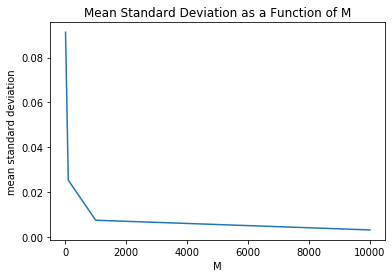

In [13]:
plt.plot(M,mean_dev)
plt.xlabel("M")
plt.ylabel("mean standard deviation")
plt.title("Mean Standard Deviation as a Function of M")

We can see that the resulting dependence is probably something like $\frac{1}{M^x}$ with x being a positive number.

<span style ="color:green;font-weight:bold ">Changes that should be made:  
    - In the parts "Testing the error rates" and "calculating mean and std" loops are repeated. It is more efficient to not repeat them but put the code in one loop. (Applies to exercise 1.3 as well)  
    - Rule A and B are correctly implemented and the errorrates correspond to expected value.  
    - The std as a function of M should be shown for both Rule A and B and for each of the thresholds.  
    - Better visualization or errors is through a figure with error rate mean over the threshold, but not necessary.  
    - For error determination easier to define error function (applies to exercise 1.3 as well) </span >

## Exercise 1.3

In this exercise we will do exactly the same computation as before using two new classifiers.

### Defining the new classifiers

In [14]:
def classifierC(x):
    p = rnd.randrange(0,10)
    if p > 5:
        return 1
    else:
        return 0

def classifierD(x):
    return 1

### Classifier C:

### Testing the errorrates

In [15]:
errordataC = []

for i in range(10):
    #Creating test_data
    M = [10,100,1000,10000]
    test_dataX = []
    test_dataY = []
    
    for i in range(len(M)):
        x,y = create_data(M[i])
        test_dataX.append(x)
        test_dataY.append(y)

    #Classifying the test data
    xt = [0.2,0.5,0.6]
    classification = [[]for i in range(len(M))]
    for j in range(len(M)):
        for k in test_dataX[j]:
            classification[j].append(classifierC(k))
    

    #calculating the errorrates
    errorrates = [[]for i in range(len(M))]
    for j in range(len(M)):
        errors = 0
        for k in range(len(classification[j])):
            if classification[j][k] != test_dataY[j][k]:
                errors += 1
        errorrates[j].append(errors/M[j])
    
    errordataC.append(errorrates)

### Calculating the errorrates and standard deviations

In [16]:
meansC = [[]for i in range(len(M))]
stddevC = [[]for i in range(len(M))]

for j in range(len(M)):
    a = []
    sum = 0
    for l in range(len(errordataC)):
        a.append(errordataC[l][j][0])
        sum += errordataC[l][j][0]
    meansC[j].append(sum/10)
    stddevC[j].append(std(a))

In [17]:
for j in range(len(M)):
    print("M = ",M[j],": errorrate =",meansC[j][0],"+/-",stddevC[j][0])

M =  10 : errorrate = 0.43999999999999995 +/- 0.0916515138991168
M =  100 : errorrate = 0.512 +/- 0.03919183588453086
M =  1000 : errorrate = 0.48840000000000006 +/- 0.013417898494175618
M =  10000 : errorrate = 0.49881000000000003 +/- 0.004476706378577887


### Plotting the errorates and standard deviations as functions of M

In [18]:
R = []
SD = []
for j in range(len(M)):
    R.append(meansC[j][0])
    SD.append(stddevC[j][0])

Text(0, 0.5, 'errorrate')

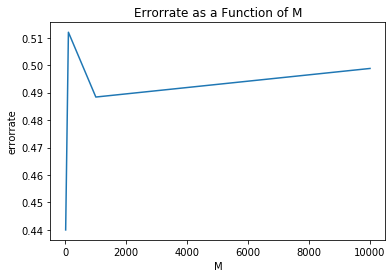

In [19]:
plt.plot(M,R)
plt.title("Errorrate as a Function of M")
plt.xlabel("M")
plt.ylabel("errorrate")

Text(0, 0.5, 'standard deviation')

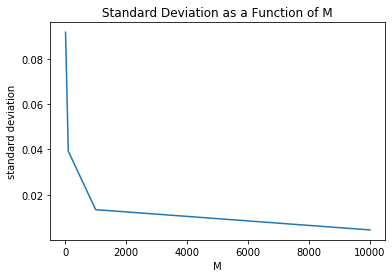

In [20]:
plt.plot(M,SD)
plt.title("Standard Deviation as a Function of M")
plt.xlabel("M")
plt.ylabel("standard deviation")

### Classifier D:

### Testing the errorrates

In [21]:
errordataD = []

for i in range(10):
    #Creating test_data
    M = [10,100,1000,10000]
    test_dataX = []
    test_dataY = []
    
    for i in range(len(M)):
        x,y = create_data(M[i])
        test_dataX.append(x)
        test_dataY.append(y)

    #Classifying the test data
    xt = [0.2,0.5,0.6]
    classification = [[]for i in range(len(M))]
    for j in range(len(M)):
        for k in test_dataX[j]:
            classification[j].append(classifierD(k))
    

    #calculating the errorrates
    errorrates = [[]for i in range(len(M))]
    for j in range(len(M)):
        errors = 0
        for k in range(len(classification[j])):
            if classification[j][k] != test_dataY[j][k]:
                errors += 1
        errorrates[j].append(errors/M[j])
    
    errordataD.append(errorrates)

### Calculating the errorrates and standard deviations

In [22]:
meansD = [[]for i in range(len(M))]
stddevD = [[]for i in range(len(M))]

for j in range(len(M)):
    a = []
    sum = 0
    for l in range(len(errordataD)):
        a.append(errordataD[l][j][0])
        sum += errordataD[l][j][0]
    meansD[j].append(sum/10)
    stddevD[j].append(std(a))

In [23]:
for j in range(len(M)):
    print("M = ",M[j],": errorrate =",meansD[j][0],"+/-",stddevD[j][0])

M =  10 : errorrate = 0.48999999999999994 +/- 0.13747727084867517
M =  100 : errorrate = 0.49300000000000005 +/- 0.04733920151417851
M =  1000 : errorrate = 0.5074000000000001 +/- 0.00770973410695856
M =  10000 : errorrate = 0.50022 +/- 0.004396771542848246


### Plotting the errorates and standard deviations as functions of M

In [24]:
R = []
SD = []
for j in range(len(M)):
    R.append(meansD[j][0])
    SD.append(stddevD[j][0])

Text(0, 0.5, 'errorrate')

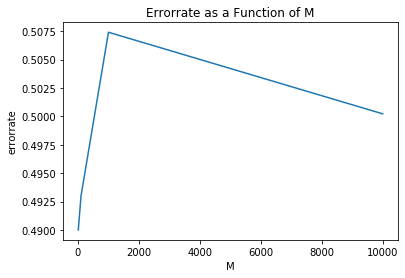

In [25]:
plt.plot(M,R)
plt.title("Errorrate as a Function of M")
plt.xlabel("M")
plt.ylabel("errorrate")

Text(0, 0.5, 'standard deviation')

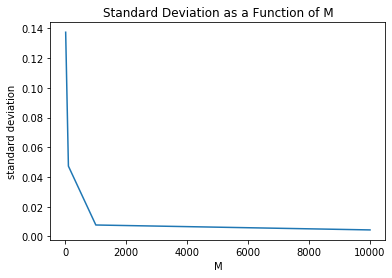

In [26]:
plt.plot(M,SD)
plt.title("Standard Deviation as a Function of M")
plt.xlabel("M")
plt.ylabel("standard deviation")

<span style ="color:green;font-weight:bold ">Changes that should be made:  
    - Classifier D is implemented correctly  
    - Classifier C is also correct, however not efficient (use random.randint(2) to randomly generate 0 or 1)  
    - Further improvements as written for exercise 1.2
</span >

## Exercise 1.4

For the neares neighbor classification we first have to define some representatives $n_0$ representing Y=0 and $n_1$ representing Y=1. We the can define a function that chooses for every given X the Y label depending on the nearest representative.

In [27]:
def neares_neighbor_classifier(X,n0,n1):
    d0 = (X-n0)**2
    d1 = (X-n1)**2
    if d0 < d1:
        return 0
    else:
        return 1

### Creating the training sets

In [41]:
x,y = create_data(1000)
M = 100 #number of training tuples
y1 = [] 	#Array for y data with Y=1
x1 = []     #Array for x data with Y=1
y0 = []     #Array for y data with Y=0
x0 = []     #Array for x data with Y=0
for i in range(len(y)):     #sorting the sets with y=1 into y1,x1 and the sets with y=0 into y0,x0
    if y[i] == 1:
        y1.append(1)
        x1.append(x[i])
    else:
        y0.append(0)
        x0.append(x[i])

training_data = [[[],[]]for i in range(M)]      #Array for the 100 training sets of size N=2
for j in range(M):
    training_data[j][0].append(0)
    training_data[j][0].append(1)
    training_data[j][1].append(x0[j])
    training_data[j][1].append(x1[j])

### Creating the test data

In [42]:
L = 1000
X,Y = create_data(L)

### Testing the 100 training sets on the test set

In [43]:
classification = [[] for i in range(M)]
for i in range(M):      #classifying the test data using the nn_classifier for every test set w/ size N = 2
    n_0 = training_data[i][1][0]
    n_1 = training_data[i][1][1]
    for j in range(len(X)):
        classification[i].append(neares_neighbor_classifier(X[j],n_0,n_1))

### Calculating the errorrates

In [44]:
errorrates = []
for i in range(M):
    temp_class = classification[i]
    sum = 0
    for j in range(L):
        if temp_class[j] != Y[j]:
            sum += 1
    errorrates.append(sum/L)

### Calculating the mean errorrate

In [45]:
mean_error = mean(errorrates)
print(mean_error)

0.34143


With 100 training sets of size 2 we get an average errorrate of $\approx$ 35%.

### Repeating with training sets of size 100

Now we need to consider 100 values for X given Y=0 and Y=1. To do so I deine a new classifier which finds the label corresponding to the training data being nearest to the given X value.

In [66]:
def nearest_neighbor_2(X,TSx, TSy):   #TSx and TSy are two arrays holding the training data for x and y
    index = find_closest(X,TSx)     #Help function finding the nearest neighbor returning its index
    return TSy[index]    #return the corrsponding label


def find_closest(X,TSx):
    index = 0   #default nearest neighbor
    dNN = (TSx[0]-X)**2      #Distance of default
    for i in range(len(TSx)):   #go through the whole TSx
        if (TSx[i]-X)**2 <= dNN:     #When finding a TS closer to the Feature X
            index = i   #And its index             
            dNN = (TSx[i]-X)**2    #and the current smallest distance
    return index 

### Creating training sets

In [67]:
training_sets_X = []
training_sets_Y = []
for i in range(M):
    x,y = create_data(100)      #creating training sets of size N=100
    training_sets_X.append(x)
    training_sets_Y.append(y)

### creating the test set

In [68]:
L = 1000
X,Y = create_data(L)

### Testing the 100 training sets

In [69]:
classification = [[] for i in range(M)]
for i in range(M):
    for j in range(len(X)):
        classification[i].append(nearest_neighbor_2(X[j],training_sets_X[i],training_sets_Y[i]))

### Calculating the errorrates

In [70]:
errorrates = []
for i in range(M):
    temp_class = classification[i]
    sum = 0
    for j in range(L):
        if temp_class[j] != Y[j]:
            sum += 1
    errorrates.append(sum/L)

### Calculating the mean error

In [71]:
mean_error = mean(errorrates)
print(mean_error)

0.05272


By increasing the number of test sets to N = 100 we were able to decrease the average error to $\approx$ 5%.

<span style ='color:green;font-weight:bold'> Cross Feedback to NN:  
    specific:    
    - neares_neighbor_classifier(X,n0,n1) function only works for X and ni equal size - probably only for single test point and training set   
    - instead of notation like 'classification = [[] for i in range(M)]' u could have a look at numpy's np.arange() function    
    - in the 'find_closest' funtion you could calculate all distances, and than use the argmin function to get the index corresonding to the samllest value, you would save a computational expensive loop.    
    general:     
    - maybe a more meaningful variable naming?    
    - maybe use something like y1 = Y[Y==1]; x1= X[Y==1] (in words: y1 =np.array(Y_values where Y is equal to 1) instead of looping over all data     
    - try to avoid looping and use vectorization (will save runtime as u also saw in second sheet)     
    - Nice that you add commands and subtitles, makes it easier to follow     
    </span >